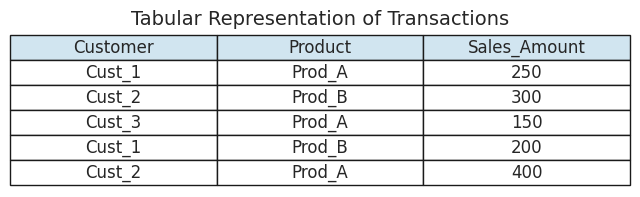

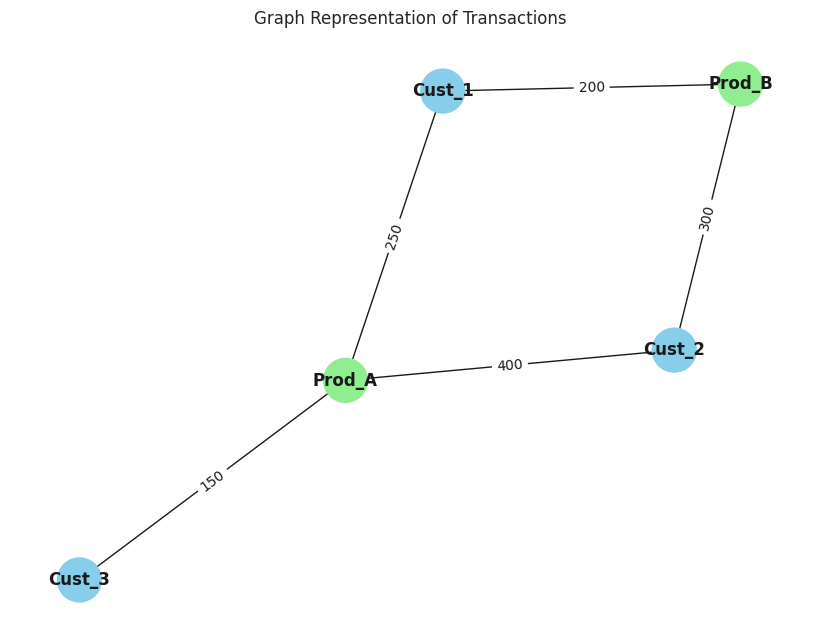

In [3]:
# Import necessary libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Create synthetic tabular data
transactions = pd.DataFrame({
    'Customer': ['Cust_1', 'Cust_2', 'Cust_3', 'Cust_1', 'Cust_2'],
    'Product': ['Prod_A', 'Prod_B', 'Prod_A', 'Prod_B', 'Prod_A'],
    'Sales_Amount': [250, 300, 150, 200, 400]
})

# Display tabular data with highlighted header using matplotlib
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')

# Create table
table = ax.table(cellText=transactions.values,
                 colLabels=transactions.columns,
                 loc='center',
                 cellLoc='center',
                 colColours=['#d1e5f0']*len(transactions.columns))

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

plt.title('Tabular Representation of Transactions', fontsize=14)
plt.show()

# Create graph representation
G = nx.Graph()

# Add nodes for customers and products
G.add_nodes_from(transactions['Customer'], type='customer')
G.add_nodes_from(transactions['Product'], type='product')

# Add edges with sales amount as edge metadata
for _, row in transactions.iterrows():
    G.add_edge(row['Customer'], row['Product'], sales_amount=row['Sales_Amount'])

# Visualize graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)

# Node colors
node_colors = ['skyblue' if G.nodes[n]['type'] == 'customer' else 'lightgreen' for n in G.nodes]

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1000, font_weight='bold')

# Edge labels
edge_labels = {(u, v): d['sales_amount'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Graph Representation of Transactions')
plt.axis('off')
plt.show()
